In [40]:
import urllib.request
import os
data_url="http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls"
data_file_path="titanic.xls"
if not os.path.isfile(data_file_path):
    result=urllib.request.urlretrieve(data_url,data_file_path)
    print(result)
else:
    print("already exist")

already exist


In [41]:
import numpy as np
import pandas as pd
df_data=pd.read_excel(data_file_path)
df_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [42]:
selected_cols=['survived','name','pclass','sex','age','sibsp','fare','embarked','parch']
selected_df_data=df_data[selected_cols]
selected_df_data=selected_df_data.sample(frac=1)
#selected_df_data[selected_df_data.isnull().values==True]
df=selected_df_data.drop(['name'],axis=1)
age_mean_value=df['age'].mean()
df['age']=df['age'].fillna(age_mean_value)
fare_mean=df['fare'].mean()
df['fare']=df['fare'].fillna(fare_mean)
df['embarked']=df['embarked'].fillna('S')

In [43]:
df['sex']=df['sex'].map({'female':0,'male':1}).astype(int)
df['embarked']=df['embarked'].map({'C':0,'Q':1,'S':2}).astype(int)
df[:3]

,survived,pclass,sex,age,sibsp,fare,embarked,parch
1162,1,3,1,29.881135,0,7.750,1,0
485,0,2,1,36.000000,0,12.875,0,0
1210,0,3,1,40.000000,1,27.900,2,4


In [44]:
from sklearn import preprocessing
ndarray_data=df.values
features=ndarray_data[:,1:]
label=ndarray_data[:,0]
minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,1))
norm_featues=minmax_scale.fit_transform(features)
y_data=label
x_data=norm_featues
train_size=int(len(x_data)*0.8)
x_train=x_data[:train_size]
y_train=y_data[:train_size]
x_test=x_data[train_size:]
y_test=y_data[train_size:]

In [45]:
import tensorflow as tf
model=tf.contrib.keras.models.Sequential()
model.add(tf.contrib.keras.layers.Dense(units=64,input_dim=7,use_bias=True,kernel_initializer='uniform',bias_initializer='zeros',activation='relu'))
model.add(tf.contrib.keras.layers.Dense(units=32,activation='sigmoid'))
model.add(tf.contrib.keras.layers.Dense(units=1,activation='sigmoid'))
model.compile(optimizer=tf.contrib.keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])   #https://www.jianshu.com/p/47172eb86b39

In [46]:
train_history=model.fit(x=x_train,y=y_train,validation_split=0.2,epochs=200,batch_size=40,verbose=2)

Train on 837 samples, validate on 210 samples
Epoch 1/200
0s - loss: 0.6494 - acc: 0.6213 - val_loss: 0.6024 - val_acc: 0.6381
Epoch 2/200
0s - loss: 0.6065 - acc: 0.6332 - val_loss: 0.5720 - val_acc: 0.6429
Epoch 3/200
0s - loss: 0.5783 - acc: 0.6655 - val_loss: 0.5489 - val_acc: 0.7476
Epoch 4/200
0s - loss: 0.5568 - acc: 0.7395 - val_loss: 0.5259 - val_acc: 0.7476
Epoch 5/200
0s - loss: 0.5363 - acc: 0.7766 - val_loss: 0.5095 - val_acc: 0.8143
Epoch 6/200
0s - loss: 0.5238 - acc: 0.7766 - val_loss: 0.4985 - val_acc: 0.8143
Epoch 7/200
0s - loss: 0.5111 - acc: 0.7945 - val_loss: 0.4849 - val_acc: 0.8000
Epoch 8/200
0s - loss: 0.5029 - acc: 0.7957 - val_loss: 0.4715 - val_acc: 0.8143
Epoch 9/200
0s - loss: 0.4940 - acc: 0.7909 - val_loss: 0.4628 - val_acc: 0.8143
Epoch 10/200
0s - loss: 0.4863 - acc: 0.7897 - val_loss: 0.4562 - val_acc: 0.8143
Epoch 11/200
0s - loss: 0.4819 - acc: 0.7873 - val_loss: 0.4510 - val_acc: 0.8143
Epoch 12/200
0s - loss: 0.4779 - acc: 0.7921 - val_loss: 0.44

0s - loss: 0.4420 - acc: 0.8112 - val_loss: 0.4067 - val_acc: 0.8143
Epoch 105/200
0s - loss: 0.4430 - acc: 0.8088 - val_loss: 0.4065 - val_acc: 0.8095
Epoch 106/200
0s - loss: 0.4411 - acc: 0.8160 - val_loss: 0.4071 - val_acc: 0.8143
Epoch 107/200
0s - loss: 0.4411 - acc: 0.8184 - val_loss: 0.4068 - val_acc: 0.8143
Epoch 108/200
0s - loss: 0.4409 - acc: 0.8184 - val_loss: 0.4079 - val_acc: 0.8190
Epoch 109/200
0s - loss: 0.4414 - acc: 0.8172 - val_loss: 0.4065 - val_acc: 0.8143
Epoch 110/200
0s - loss: 0.4406 - acc: 0.8148 - val_loss: 0.4078 - val_acc: 0.8095
Epoch 111/200
0s - loss: 0.4408 - acc: 0.8112 - val_loss: 0.4067 - val_acc: 0.8143
Epoch 112/200
0s - loss: 0.4406 - acc: 0.8112 - val_loss: 0.4073 - val_acc: 0.8095
Epoch 113/200
0s - loss: 0.4459 - acc: 0.8053 - val_loss: 0.4078 - val_acc: 0.8190
Epoch 114/200
0s - loss: 0.4439 - acc: 0.8100 - val_loss: 0.4071 - val_acc: 0.8143
Epoch 115/200
0s - loss: 0.4401 - acc: 0.8148 - val_loss: 0.4079 - val_acc: 0.8095
Epoch 116/200
0s -

In [31]:
import matplotlib.pyplot as plt
def visu(train_history,train_metric,validation_metric):
    plt.plot(train_history.history[train_metric])
    plt.plot(train_history.history[validation_metric])
    plt.title('train history')
    plt.ylabel(train_metric)
    plt.xlabel('epoch')
    plt.legend(['train','validition'],loc='upper left')
    plt.show()

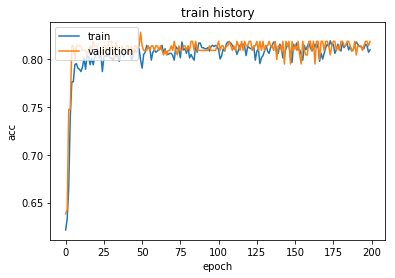

In [47]:
visu(train_history,'acc','val_acc')